# Lab 8: Define and Solve an ML Problem of Your Choosing

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [2]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv(bookReviewDataSet_filename)

df.head(20)

,Review,Positive Review
0,This was perhaps the best of Johannes Steinhof...,True
1,This very fascinating book is a story written ...,True
2,The four tales in this collection are beautifu...,True
3,The book contained more profanity than I expec...,False
4,We have now entered a second time of deep conc...,True
5,I don't know why it won the National Book Awar...,False
6,The daughter of a prominent Boston doctor is d...,False
7,I was very disapointed in the book.Basicly the...,False
8,I think in retrospect I wasted my time on this...,False
9,I have a hard time understanding what it is th...,False


## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

In [3]:
print(df.columns.tolist())

['Review', 'Positive Review']


<b>Defining problem</b>
I chose the book review data set built off of the book reviews data. I will be predicting whether or not something is a positive review. This is a supervised problem and is binary classication. The feature is the book review. This is an important problem with real world applications because being able to accurately determine if reviews are positive or negative sentiment can help to quickly get an overview of public sentiment as well as quickly identify strong reviews to improve the marketing of the book.  

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI

<b>notes</b>: I would need to finding any missing values. I would also need to go through the reviews and simplify them by removing stop words and articles to remove noise for when I train the model.

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
<b>notes</b>: I would like to use both logistic regression and a neural network predict whether a review is positive or negative. Based on this, I will also need to transform the data with a TF-IDF vectorizer to convert the text into a numerical representation. 
I think i could also convert words to lowercase, remove punctuation, and lemmatize the words using gensim. I might also consider filtering the reviews by length if needed. 

3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?

<b>notes</b> to evaluate performance I will first compare the training and validation accuracy. Then to finetune and take care of overfitting I will do things like test different epoch numbers and dropout layers to get the two accuracies closer to each other. After that I will evaluate on the test set and check the loss and accuracy. After that I would finetune the model by adjusting the learning rate and testing different units for the hidden layers. 
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

### cleaning the data

In [4]:
# YOUR CODE HERE
df.describe()


,Review,Positive Review
count,1973,1973
unique,1865,2
top,I have read several of Hiaasen's books and lov...,False
freq,3,993


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1973 entries, 0 to 1972
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Review           1973 non-null   object
 1   Positive Review  1973 non-null   bool  
dtypes: bool(1), object(1)
memory usage: 17.5+ KB


In [6]:
df.isna().sum()  #no missing values

Review             0
Positive Review    0
dtype: int64

In [7]:
print(len(df['Review'].unique()))
print(df.shape)

#some reviews are repeated, based on how the length of unique
#is shorter than the total examples in the first part of the shape tuple

1865
(1973, 2)


In [8]:
print(df['Review'].duplicated().sum())
df['Review'].duplicated().any()
print(df[df['Review'].duplicated()])

108
                                                 Review  Positive Review
144   I am a Jew living in a college town in Mississ...            False
149   I have enjoyed many of Mark's novels (Do You K...            False
309   Dr. Hawkins first book, Power vs Force was int...            False
399   I picked this up because it's considered a cla...            False
405   I am so sorry that I bought this book.  It is ...            False
...                                                 ...              ...
1922  Don't get me wrong, I really enjoy Neal Stephe...            False
1935  I thought this book would be great and was rea...            False
1946  ...if you're in the bathroom with time on your...            False
1962  Ripping off King, but with more sex, shallower...            False
1963  This book expounds endlessly on how best to li...            False

[108 rows x 2 columns]


In [9]:
df = df.drop_duplicates(subset=['Review'])
df.shape

(1865, 2)

### class imbalance

C:\Users\ramma\AppData\Local\Temp\ipykernel_64340\2413790535.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Positive Review', data=df, palette='viridis')


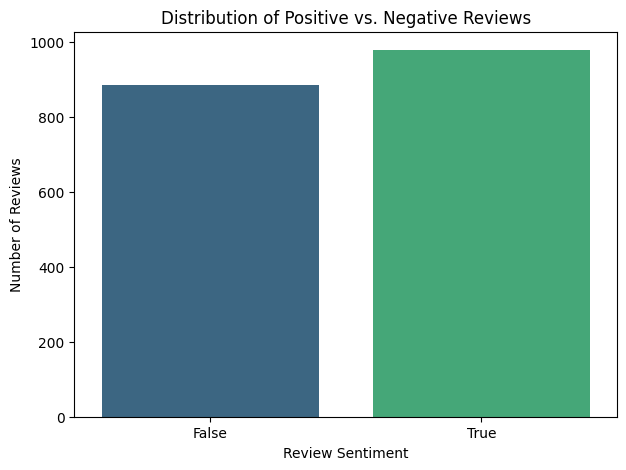

In [10]:
plt.figure(figsize=(7, 5))

sns.countplot(x='Positive Review', data=df, palette='viridis')
plt.title('Distribution of Positive vs. Negative Reviews')
plt.xlabel('Review Sentiment')
plt.ylabel('Number of Reviews')
plt.show()

this dataset is relatively balanced!

### model specific cleaning

In [11]:
original_reviews = df['Review']

In [12]:
import gensim

In [13]:
df['Review'] = df['Review'].apply(lambda row: gensim.utils.simple_preprocess(row))

In [14]:
print(df['Review'])

0       [this, was, perhaps, the, best, of, johannes, ...
1       [this, very, fascinating, book, is, story, wri...
2       [the, four, tales, in, this, collection, are, ...
3       [the, book, contained, more, profanity, than, ...
4       [we, have, now, entered, second, time, of, dee...
                              ...                        
1968    [purchased, the, book, with, the, intention, o...
1969    [there, are, so, many, design, books, but, the...
1970    [am, thilled, to, see, this, book, being, avai...
1971    [as, many, have, stated, before, me, the, book...
1972    [love, this, book, it, is, terrific, blend, of...
Name: Review, Length: 1865, dtype: object


In [15]:
# re-join the words in review for td-idf!
df['Review'] = df['Review'].apply(lambda tokens: ' '.join(tokens))

## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

<Double click this Markdown cell to make it editable, and record your answers here.>

<b>Answers</b>
I only had one features 'Reviews' but I've analyzed it and cleaned it up by removing duplicates and processing it with gensim.
I will split the data into train and test data sets then use TF-IDF vectorizer to transform the text into numerical features.
I will use the logistic regression and neural network models.
For logistic regression, I will train the model on the training vector, then find the area under the curve (AUC) to evalute the model. 
For neural network, I will construct the model out of hidden layers, and create sgd optimizer and loss function to compile the model. 
To improve the models:

* neural network: adjusting epochs, dropout layers, and learning rate
* for logistic regression: finetuning regularization

Then I will test both on the test set. 

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [16]:
# YOUR CODE HERE
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import time

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

### vectorizing

In [17]:
# YOUR CODE HERE
y = df['Positive Review']
X = df.drop(columns='Positive Review')

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1234)

In [19]:
tfidf_vectorizer=TfidfVectorizer()
tfidf_vectorizer.fit(X_train['Review'])
X_train_tfidf = tfidf_vectorizer.transform(X_train['Review'])
X_test_tfidf = tfidf_vectorizer.transform(X_test['Review'])

### neural network

In [20]:
vocabulary_size = len(tfidf_vectorizer.vocabulary_)

print(vocabulary_size)

18082


In [21]:
nn_model = keras.Sequential()

input_layer = keras.layers.InputLayer(input_shape = (vocabulary_size,))
nn_model.add(input_layer)

hidden1 = keras.layers.Dense(units=64, activation='relu')
nn_model.add(hidden1)
nn_model.add(keras.layers.Dropout(.5))

hidden2 = keras.layers.Dense(units=32, activation='relu')
nn_model.add(hidden2)
nn_model.add(keras.layers.Dropout(.5))

hidden3 = keras.layers.Dense(units=16, activation='relu')
nn_model.add(hidden3)
nn_model.add(keras.layers.Dropout(.25))

output_layer = keras.layers.Dense(units=1, activation='sigmoid')
nn_model.add(output_layer)

nn_model.summary()

C:\Users\ramma\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │     1,157,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,159,937 (4.42 MB)

 Trainable params: 1,159,937 (4.42 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
sgd_optimizer = keras.optimizers.SGD(learning_rate = 0.1)

In [23]:
loss_fn = keras.losses.BinaryCrossentropy(from_logits = False)

In [24]:
nn_model.compile(optimizer = sgd_optimizer, loss = loss_fn, metrics=['accuracy'])

In [25]:
##from assignment 8 - logging information
class ProgBarLoggerNEpochs(keras.callbacks.Callback):
    
    def __init__(self, num_epochs: int, every_n: int = 50):
        self.num_epochs = num_epochs
        self.every_n = every_n
    
    def on_epoch_end(self, epoch, logs=None):
        if (epoch + 1) % self.every_n == 0:
            s = 'Epoch [{}/ {}]'.format(epoch + 1, self.num_epochs)
            logs_s = ['{}: {:.4f}'.format(k.capitalize(), v)
                      for k, v in logs.items()]
            s_list = [s] + logs_s
            print(', '.join(s_list))


In [26]:
t0 = time.time() # start time

num_epochs = 30 # epochs

history = nn_model.fit(X_train_tfidf.toarray(), y_train, epochs = num_epochs, verbose = 0, validation_split = 0.2, callbacks=[ProgBarLoggerNEpochs(num_epochs, every_n=5)])

t1 = time.time() # stop time

print('Elapsed time: %.2fs' % (t1-t0))

Epoch [5/ 30], Accuracy: 0.5322, Loss: 0.6913, Val_accuracy: 0.5071, Val_loss: 0.6931
Epoch [10/ 30], Accuracy: 0.5331, Loss: 0.6893, Val_accuracy: 0.5071, Val_loss: 0.6917
Epoch [15/ 30], Accuracy: 0.6002, Loss: 0.6668, Val_accuracy: 0.5179, Val_loss: 0.6796
Epoch [20/ 30], Accuracy: 0.6860, Loss: 0.6191, Val_accuracy: 0.5607, Val_loss: 0.6638
Epoch [25/ 30], Accuracy: 0.7397, Loss: 0.5509, Val_accuracy: 0.6000, Val_loss: 0.6401
Epoch [30/ 30], Accuracy: 0.7925, Loss: 0.4572, Val_accuracy: 0.7000, Val_loss: 0.5681
Elapsed time: 16.70s


#### evaluating and improving neural network

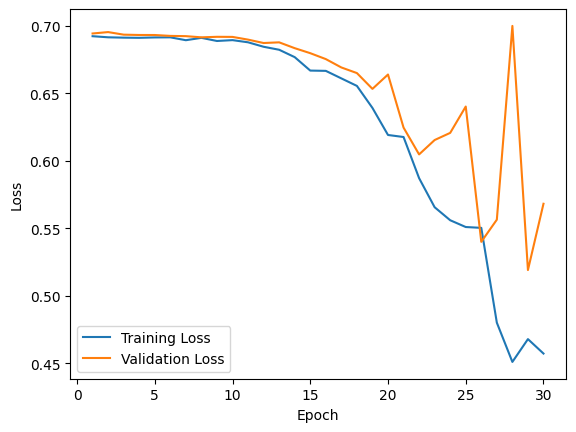

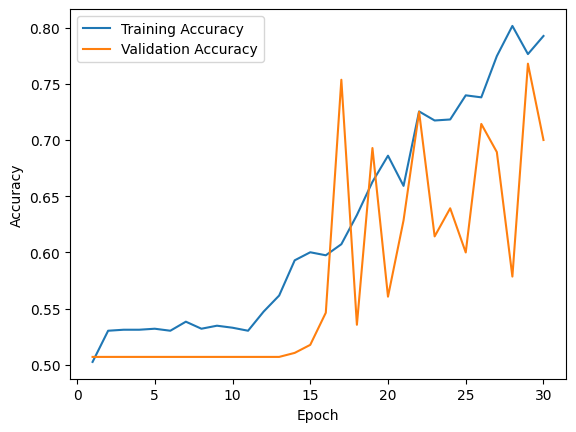

In [27]:
# Plot training and validation loss
plt.plot(range(1, num_epochs + 1), history.history['loss'], label='Training Loss')
plt.plot(range(1, num_epochs + 1), history.history['val_loss'], label='Validation Loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Plot training and validation accuracy
plt.plot(range(1, num_epochs + 1), history.history['accuracy'], label='Training Accuracy')
plt.plot(range(1, num_epochs + 1), history.history['val_accuracy'], label='Validation Accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


<b>With 55 epochs, no dropout layers - definitely overfitting:</b>
Epoch [55/ 55], Accuracy: 1.0000, Loss: 0.0012, Val_accuracy: 0.7500, Val_loss: 0.7189
Elapsed time: 24.38s

I will test different epoch layer and add some dropout layer to finetune this model.

<b>55 epochs, three dropout layers (0.5, 0.5, 0.25) for each hidden layer</b>: 

Epoch [55/ 55], Accuracy: 0.8399, Loss: 0.4359, Val_accuracy: 0.7607, Val_loss: 0.5163
Elapsed time: 16.34s

⬆️ 7% difference in accuracy between training and validation accuracy

I tried various combinations after this but couldn't find a better fit. 
<b>epochs 25, dropout layers (0.25, .5, 0.25)</b>:

Epoch [25/ 25], Accuracy: 0.8184, Loss: 0.4249, Val_accuracy: 0.7321, Val_loss: 0.5201

⬆️ 8% difference between training and validation

So i will go with 55 epochs and three dropout layers (0.5, 0.5, and 0.25)

However, after retesting this, I found that 30 epochs seems to more consistently produce training and validation accuracies within 10% of each other


Epoch [30/ 30], Accuracy: 0.8113, Loss: 0.4286, Val_accuracy: 0.7393, Val_loss: 0.5032
Elapsed time: 9.32s

Epoch [30/ 30], Accuracy: 0.7925, Loss: 0.4572, Val_accuracy: 0.7000, Val_loss: 0.5681
Elapsed time: 16.70s

### logistic regression

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

In [30]:
model = LogisticRegression(max_iter=200)
model.fit(X_train_tfidf, y_train)

probability_predictions = model.predict_proba(X_test_tfidf)[:,1]
class_label_predictions = model.predict(X_test_tfidf)

auc = roc_auc_score(y_test, probability_predictions)
print('AUC on the test data: {:.4f}'.format(auc))

AUC on the test data: 0.8862


In [31]:
print('Review #1:\n')
print(original_reviews[14])

print('\nPrediction: Is this a positive review? {}\n'.format(class_label_predictions[14])) 

print('Actual: Is this a positive review? {}\n'.format(y_test.to_numpy()[14]))


Review #1:

Typical Feinstein ("A Season on the Brink" excepted).  Quick, gossipy, superficial, fawning, etc., etc.  This book is about the 2002 U.S. Open Golf Championship at the Bethpage Black Golf Course, a New York State Park course on Long Island.  The subtitle, "Inside the Ropes at Bethpage Black," is used here as a figure of speech, meaning "behind the scenes."  ("Inside the ropes" is normally used in the context of a professional golf tournament to refer to the actual playing area itself -- spectators are separated from the golfers, caddies, officials, and other chosen few by thin ropes that tell the spectators how close they can get to the action.)  Feinstein's purpose is to give the reader a look at the unfolding of a golf tournament from its conception to its completion.  We see U.S Golf Association (the organization that conducts the tournament) leaders in action and learn something about the logistics of putting on a golf tournament (e.g., 4,850 people willing to volunteer